In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 
import cv2
import pickle
import pandas as pd
import itertools
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import preprocess_input

%matplotlib inline

In [13]:
path = "./face_shape_classification/"

X_train = np.asarray(pickle.load(open(path + "X_train_gray.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_gray.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_gray.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_gray.pickle","rb")))

In [14]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (3981, 224, 224, 1)
y_train shape (3981, 5)
--------------------
X_test shape (998, 224, 224, 1)
y_test shape (998, 5)


In [15]:
import tensorflow as tf

# GPU 사용을 비활성화하여 CPU만 사용하도록 설정
tf.config.set_visible_devices([], 'GPU')

In [16]:
model_path = './saved_face_models/boxing_1.keras'
model = tf.keras.models.load_model(model_path)

In [18]:
# Make predictions
y_actual = np.argmax(y_test, axis=-1)
y_predict_scratch = np.argmax(model.predict(X_test), axis=1)
predict_proba_scratch = model.predict(X_test)
model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6779 - loss: 1.4418


[1.380157709121704, 0.6783567070960999]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Accuracy on selected 10 random images: 70.00%


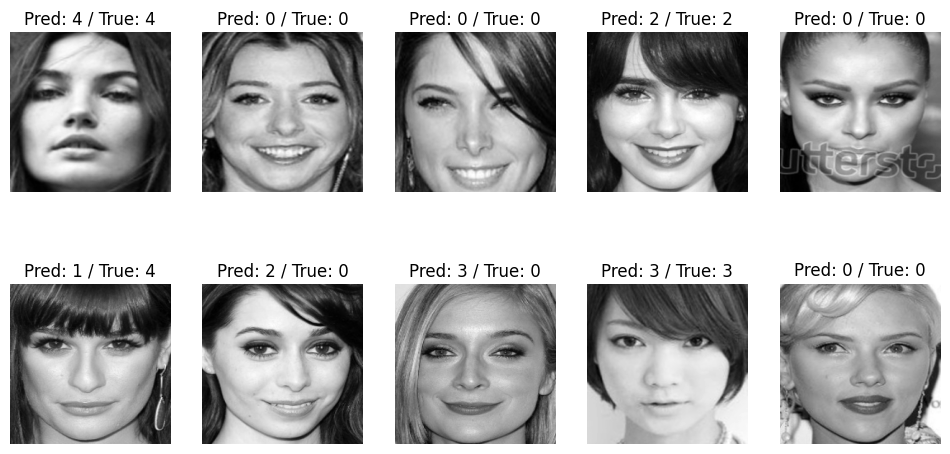

In [19]:
import random
from sklearn.metrics import accuracy_score
# 랜덤으로 10개 샘플 선택
random_indices = random.sample(range(len(X_test)), 10)
random_images = [X_test[i] for i in random_indices]
random_labels = [y_test[i] for i in random_indices]

# 모델 예측
predictions = model.predict(np.array(random_images))

# 예측 결과를 라벨로 변환
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(random_labels, axis=1)

# 정확도 출력
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy on selected 10 random images: {accuracy * 100:.2f}%")

# 결과 시각화 (10개의 예시 이미지)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    # 이미지 데이터 (X_test의 값은 0~255 범위일 가능성이 있어, 0~1로 정규화 또는 변경 필요할 수 있음)
    image = random_images[i].reshape(224, 224)  # Assuming the input size is 224x224
    axes[i].imshow(image, cmap='gray')
    
    # 예측 결과와 실제 값 표시
    axes[i].set_title(f"Pred: {predicted_classes[i]} / True: {true_classes[i]}")
    axes[i].axis('off')

plt.show()

In [20]:
model_path = './saved_face_models/vgg16.keras'
model2 = tf.keras.models.load_model(model_path)

In [21]:
# Make predictions
X_test_rgb = np.repeat(X_test, 3, axis=-1)  # (N, 224, 224, 1) => (N, 224, 224, 3)
y_actual = np.argmax(y_test, axis=-1)
y_predict_scratch = np.argmax(model2.predict(X_test_rgb ), axis=1)
predict_proba_scratch = model2.predict(X_test_rgb )
model2.evaluate(X_test_rgb , y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.8875 - loss: 0.3595


[0.348457396030426, 0.8837675452232361]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step
Accuracy on selected 10 random images: 100.00%


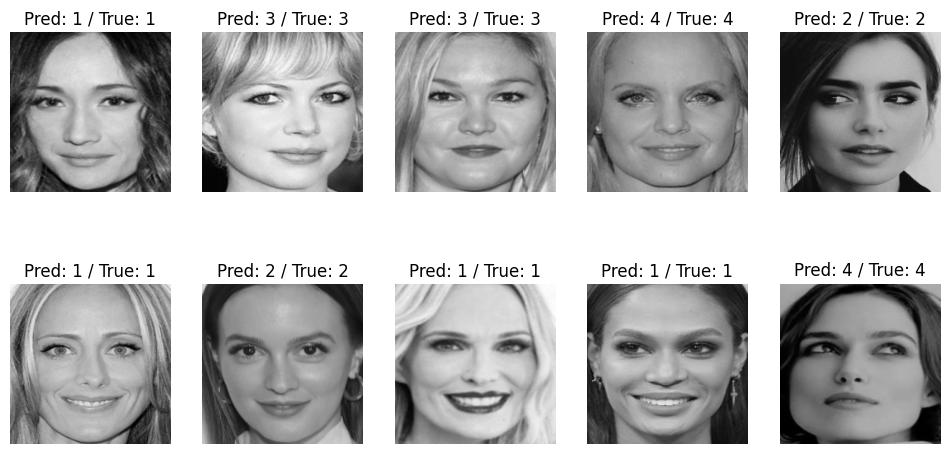

In [37]:
import random
from sklearn.metrics import accuracy_score
# 랜덤으로 10개 샘플 선택
random_indices = random.sample(range(len(X_test)), 10)
random_images = [X_test[i] for i in random_indices]
random_labels = [y_test[i] for i in random_indices]

random_images = np.array(random_images)
if len(random_images.shape) == 4 and random_images.shape[-1] == 1:  # (N, 224, 224, 1)
    random_images_rgb = np.repeat(random_images, 3, axis=-1)  # 채널 3으로 확장
elif len(random_images.shape) == 3:  # (224, 224) 형태일 경우
    random_images_rgb = np.repeat(random_images[..., np.newaxis], 3, axis=-1)  # (224, 224, 1) -> (224, 224, 3)
else:
    random_images_rgb = random_images  # 이미 (224, 224, 3)일 경우 그대로 사용

if random_images_rgb.max() > 1.0:  # 값이 1보다 크면 0~255 범위일 가능성 있음
    random_images_rgb = preprocess_input(random_images_rgb)
 
# 모델 예측
predictions = model2.predict(random_images_rgb)

# 예측 결과를 라벨로 변환
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(random_labels, axis=1)

# 정확도 출력
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy on selected 10 random images: {accuracy * 100:.2f}%")

# 결과 시각화 (10개의 예시 이미지)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    # 이미지 데이터 (X_test의 값은 0~255 범위일 가능성이 있어, 0~1로 정규화 또는 변경 필요할 수 있음)
    # image = random_images[i].reshape(224, 224, 3)
    # image = random_images[i].reshape(224, 224)  
    image = random_images_rgb[i]
    axes[i].imshow(image, cmap='gray')
    
    # 예측 결과와 실제 값 표시
    axes[i].set_title(f"Pred: {predicted_classes[i]} / True: {true_classes[i]}")
    axes[i].axis('off')

plt.show()

In [69]:
# 이미지 경로 
from PIL import Image
from tensorflow.keras.preprocessing import image
from mtcnn import MTCNN

# 2. MTCNN을 이용해 얼굴 감지
detector = MTCNN()

# 카테고리 및 레이블 맵 정의
categories = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
label_map = {0: 'Heart', 1: 'Oblong', 2: 'Oval', 3: 'Round', 4: 'Square'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Predicted Class: Oval
Confidence: 100.00%


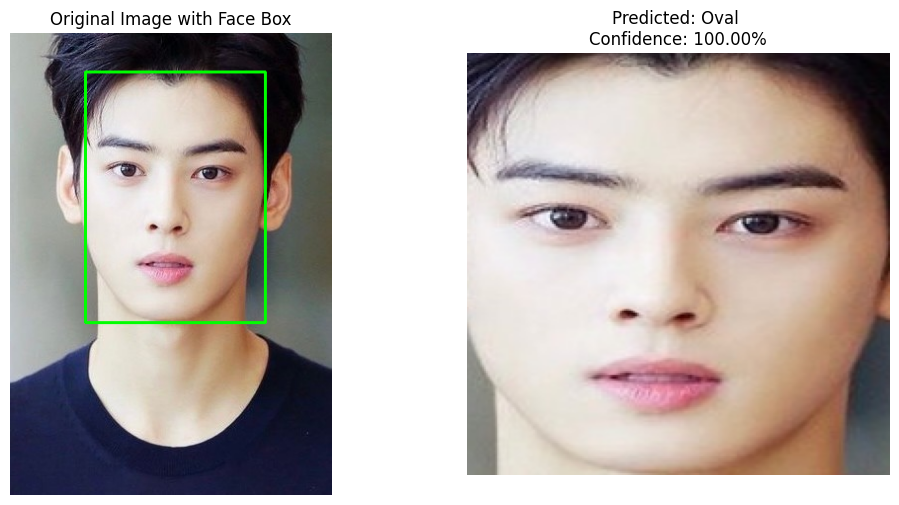

In [78]:
# 이미지 로드
img_path = 'image2.jpg'  # 새로 다운받은 이미지 경로
img = Image.open(img_path)

# 이미지를 BGR 포맷으로 변환 (OpenCV에서 사용하기 위해)
img_bgr = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# 얼굴 감지
faces = detector.detect_faces(img_bgr)

# 얼굴이 감지되지 않으면 예외 처리
if len(faces) == 0:
    print("No face detected")
else:
    # 3. 얼굴 영역만 자르기 (여기서는 첫 번째 얼굴을 사용)
    x, y, w, h = faces[0]['box']
    face_img = img_bgr[y:y+h, x:x+w]

    # 4. 자른 얼굴을 PIL 이미지로 변환 (VGG16 모델에 맞게 전처리하기 위해)
    face_pil = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    
    # 5. 이미지를 VGG16 모델에 맞는 224x224 크기로 리사이즈
    face_resized = face_pil.resize((224, 224))

    # 6. 이미지를 numpy 배열로 변환하고 RGB 채널로 확장
    img_array = np.array(face_resized)
    img_array = np.expand_dims(img_array, axis=0)  # (1, 224, 224, 3)로 만듦

    # 7. VGG16에 맞게 전처리: RGB 채널, 값 범위 [-1, 1]로 정규화
    img_array = preprocess_input(img_array)  # VGG16에 맞게 전처리

    # 원본 이미지에서 얼굴 영역에 사각형 그리기 (Boxing 처리)
    img_bgr_with_box = img_bgr.copy()
    cv2.rectangle(img_bgr_with_box, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # 4. 모델 예측
    predictions = model2.predict(img_array)

    # 5. 예측 결과
    predicted_class = np.argmax(predictions, axis=1)
    confidence = np.max(predictions)

    predicted_label = label_map[predicted_class[0]]

    # 6. 예측 결과 출력
    print(f"Predicted Class: {predicted_label}")
    print(f"Confidence: {confidence * 100:.2f}%")

    # 시각화: 원본 이미지, 얼굴 영역에 사각형을 그린 이미지, 예측 결과
    plt.figure(figsize=(12, 6))

    # 원본 이미지와 얼굴 영역에 사각형 그린 이미지
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_bgr_with_box, cv2.COLOR_BGR2RGB))
    plt.title(f"Original Image with Face Box")
    plt.axis('off')

    # VGG16에 맞게 전처리된 얼굴 이미지와 예측 결과
    plt.subplot(1, 2, 2)
    plt.imshow(face_resized)
    plt.title(f"Predicted: {predicted_label} \nConfidence: {confidence * 100:.2f}%")
    plt.axis('off')

    plt.show()